Columns: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2020-01-31         M                             5.48   
1  Andhra Pradesh 2020-02-29         M                             5.83   
2  Andhra Pradesh 2020-03-31         M                             5.79   
3  Andhra Pradesh 2020-04-30         M                            20.51   
4  Andhra Pradesh 2020-05-31         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South

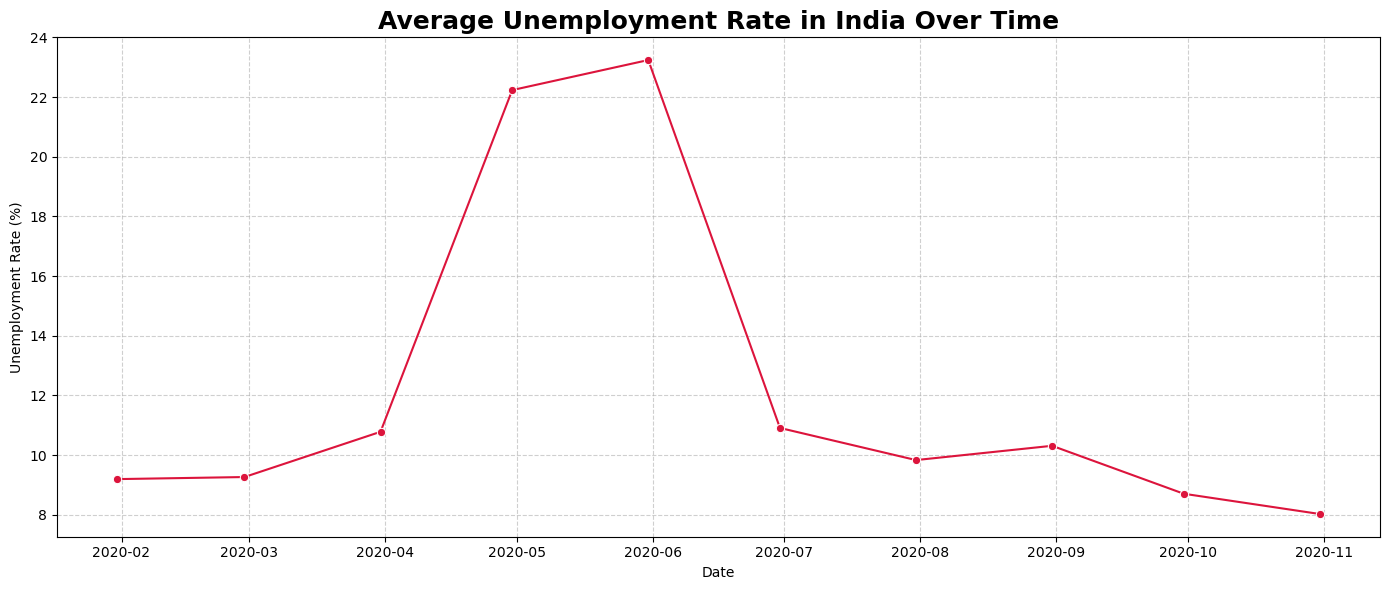

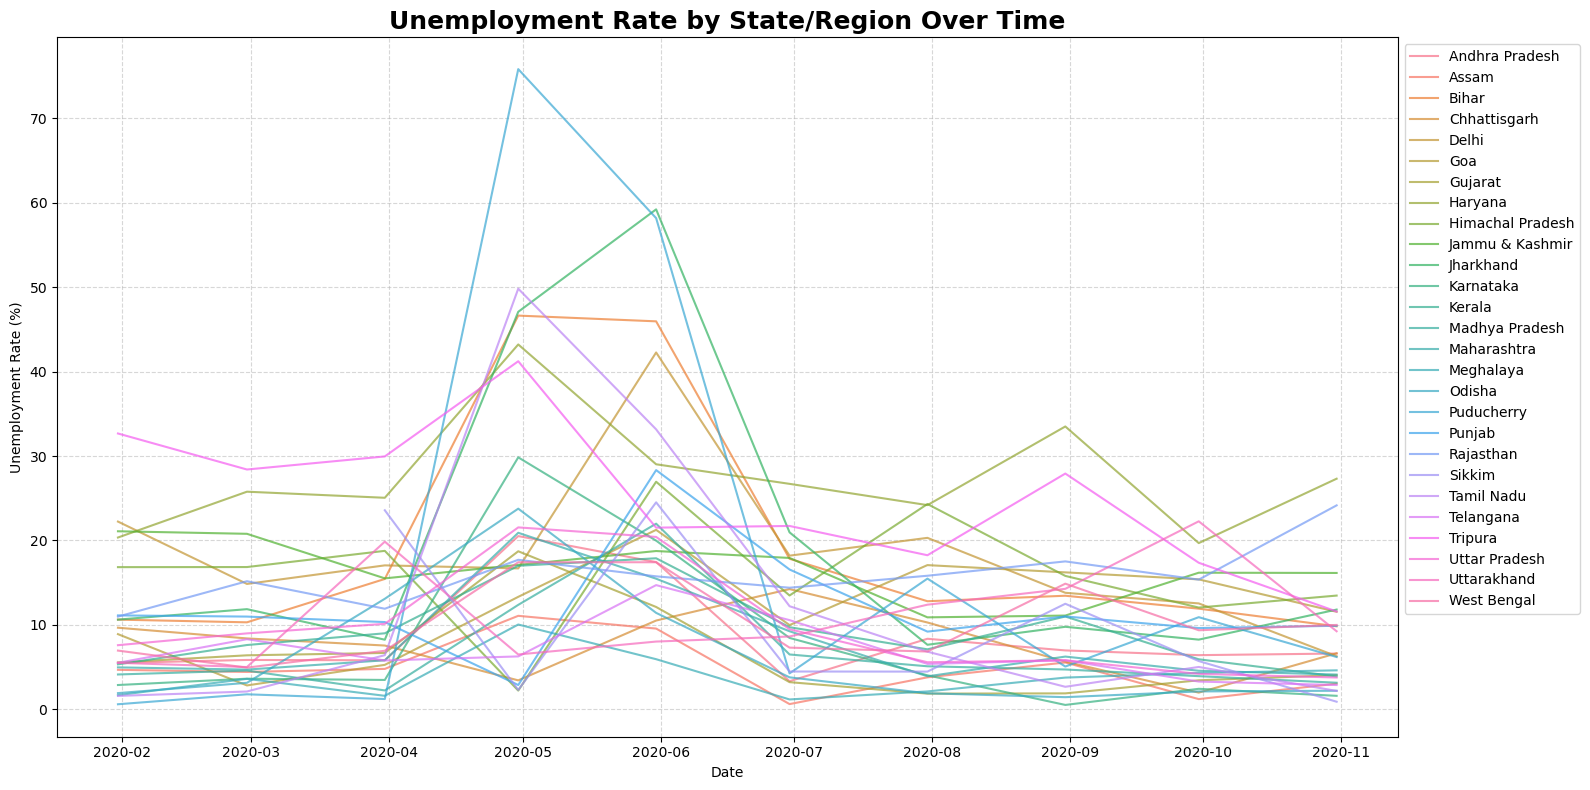

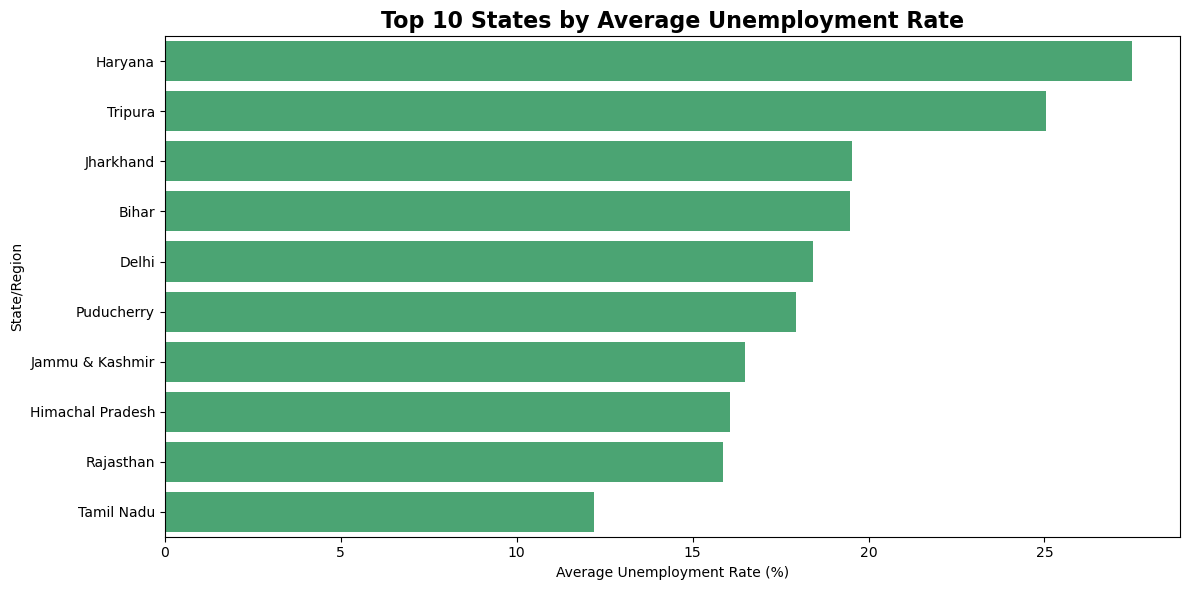

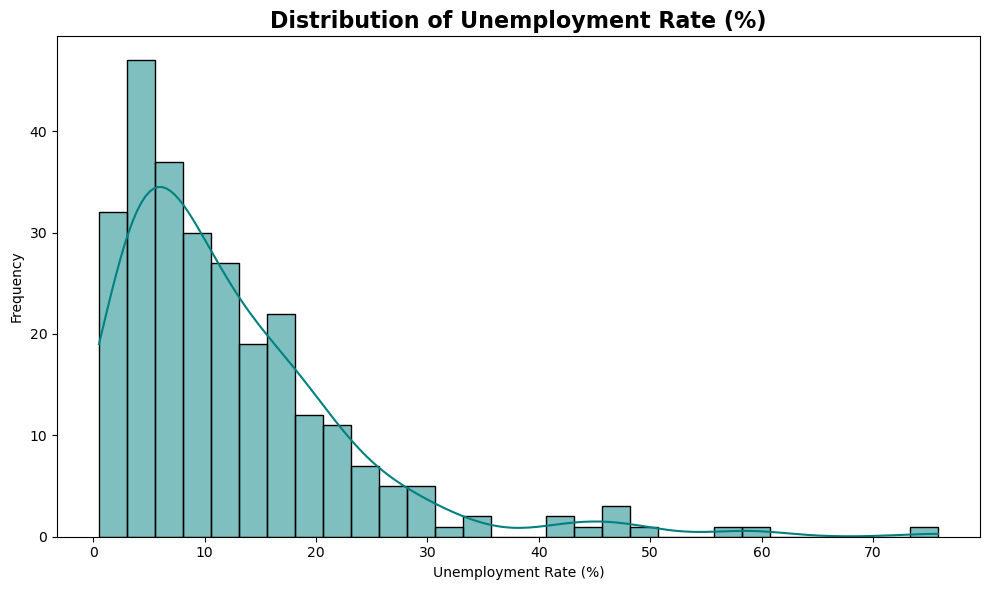

In [1]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load and clean data
df = pd.read_csv(r"C:\Users\bhavya gupta\Downloads\archive (3)\Unemployment_Rate_upto_11_2020.csv")
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

print("Columns:", df.columns.tolist())
print(df.head())

# 3. National Unemployment Trend
national = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=national, marker='o', color='crimson')
plt.title('Average Unemployment Rate in India Over Time', fontsize=18, fontweight='bold')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Statewise Unemployment Trend
plt.figure(figsize=(16,8))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Region', data=df, alpha=0.7)
plt.title('Unemployment Rate by State/Region Over Time', fontsize=18, fontweight='bold')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Top 10 States by Average Unemployment Rate
state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)
state_df = state_avg.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=state_df, x='Estimated Unemployment Rate (%)', y='Region', color='mediumseagreen')  # Fixed warning
plt.title('Top 10 States by Average Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State/Region')
plt.tight_layout()
plt.show()

# 6. Unemployment Rate Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=30, kde=True, color='teal')
plt.title('Distribution of Unemployment Rate (%)', fontsize=16, fontweight='bold')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Columns: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                   

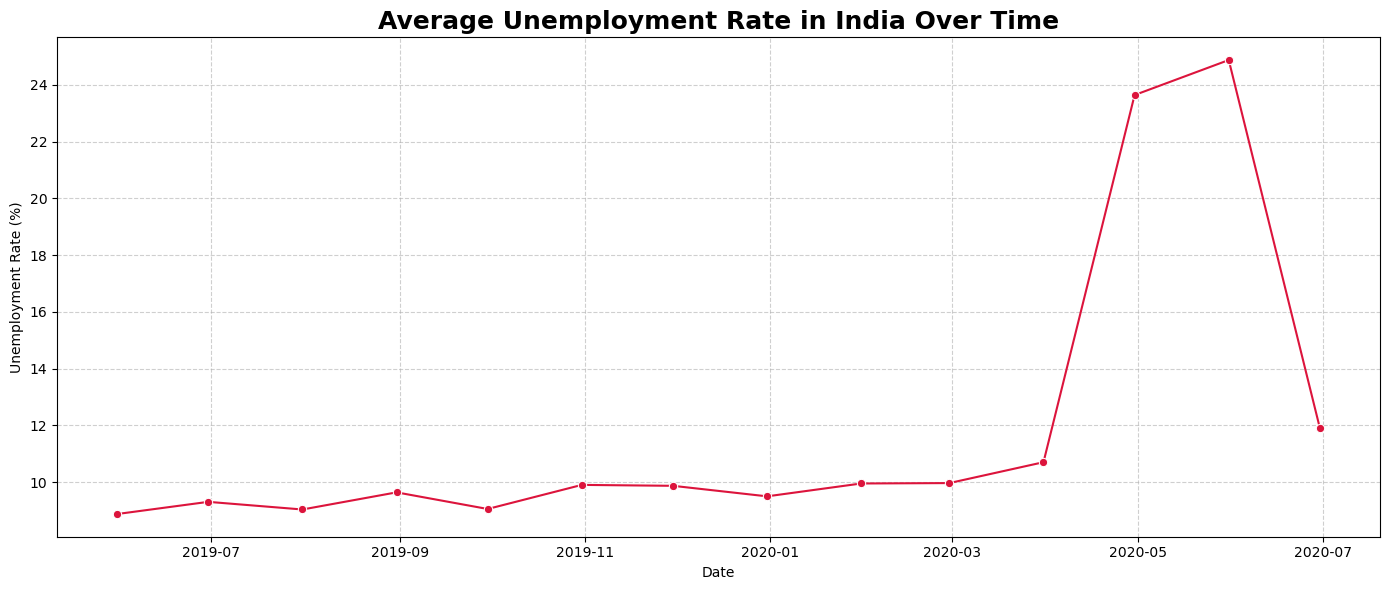

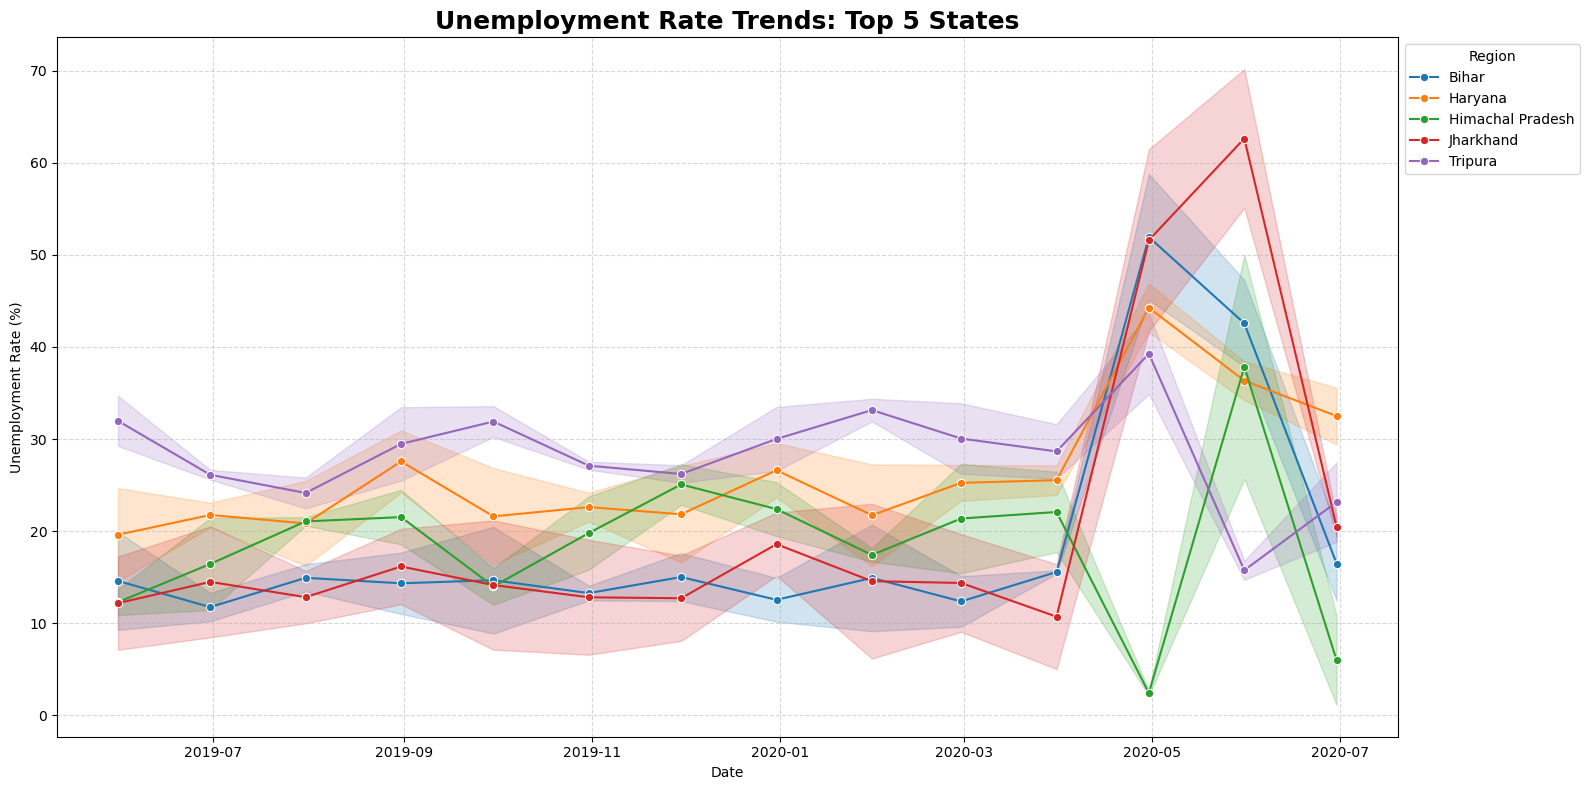

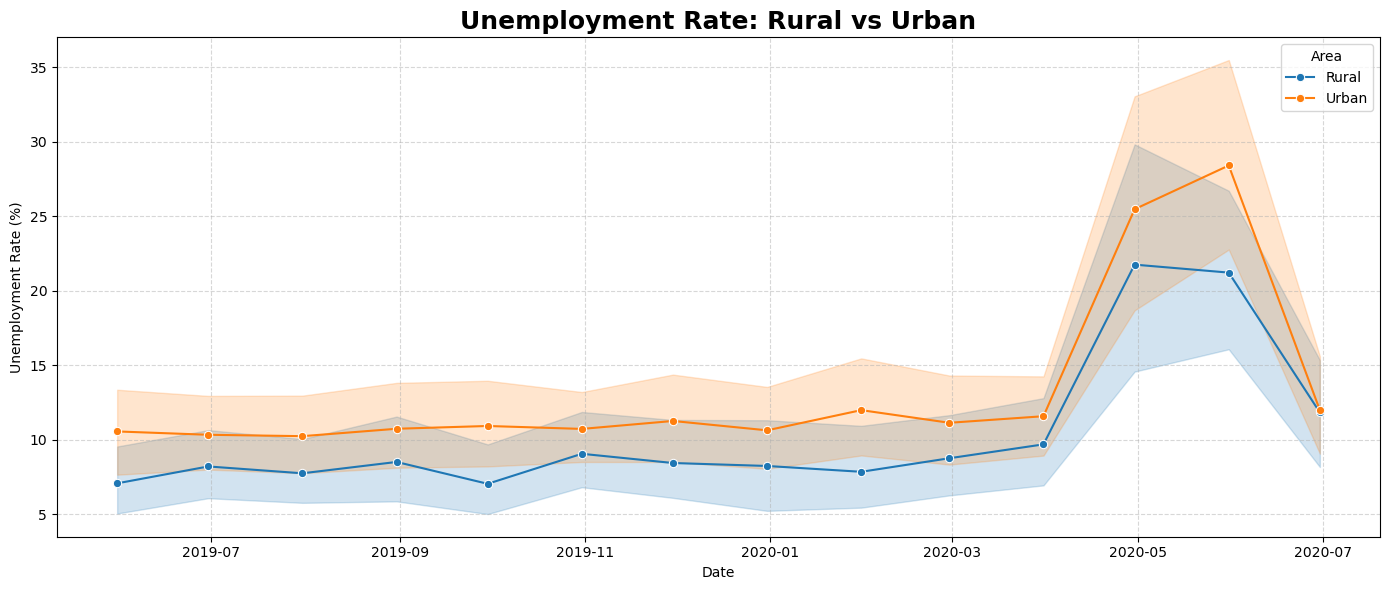

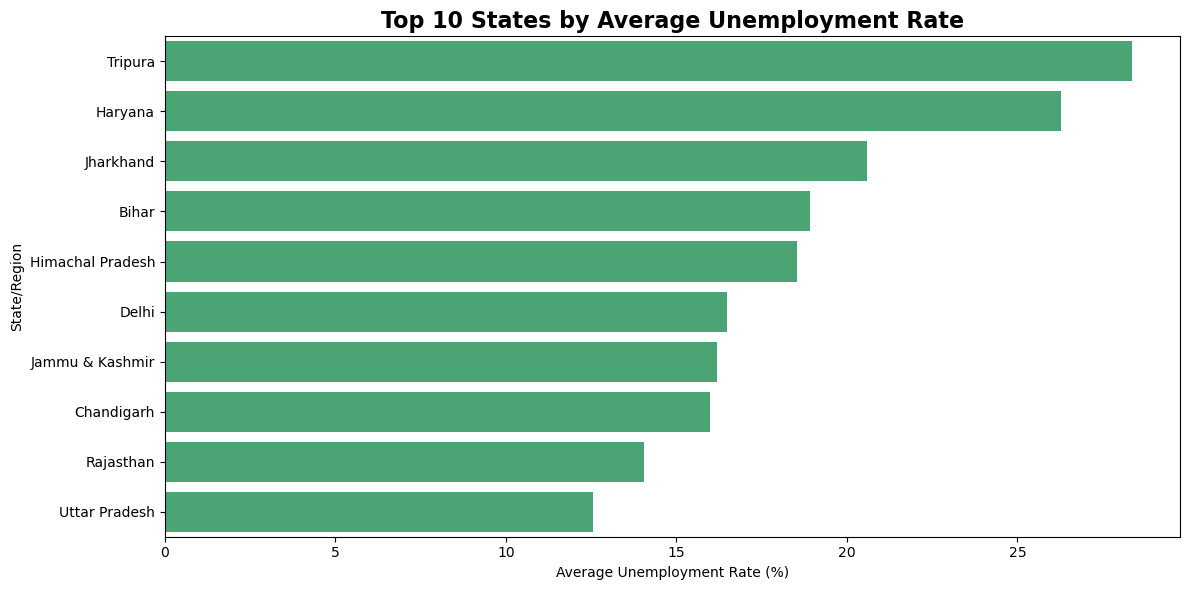

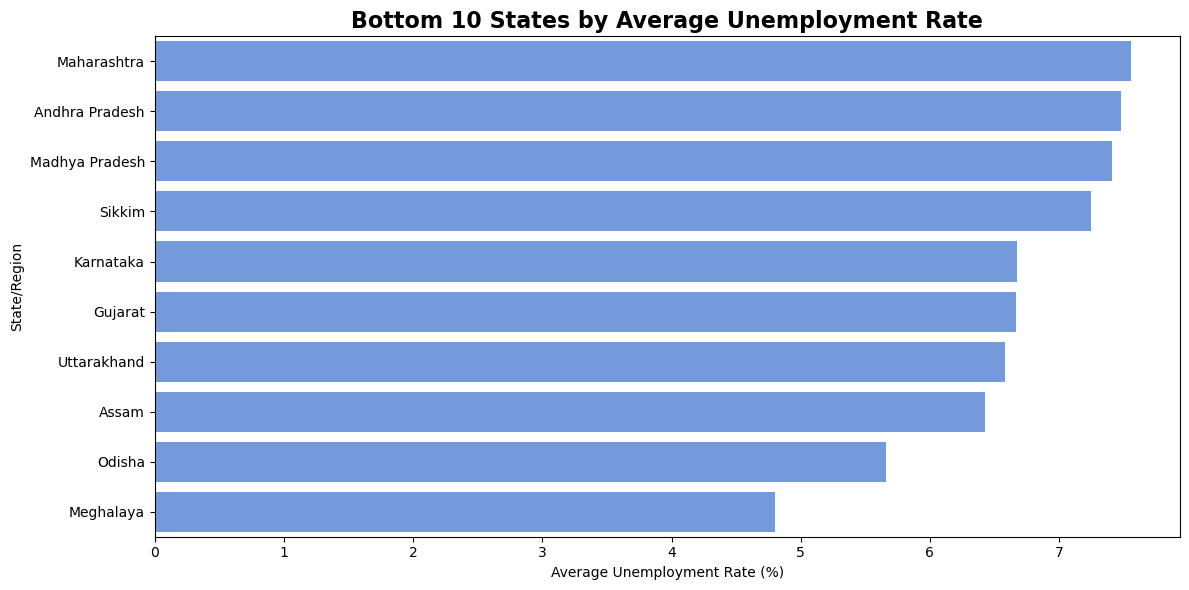

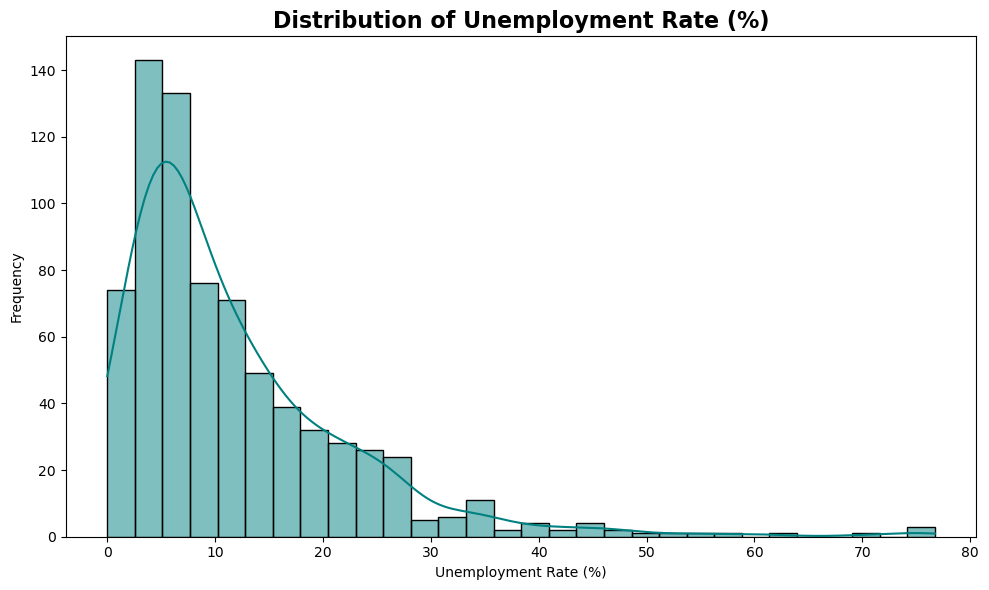

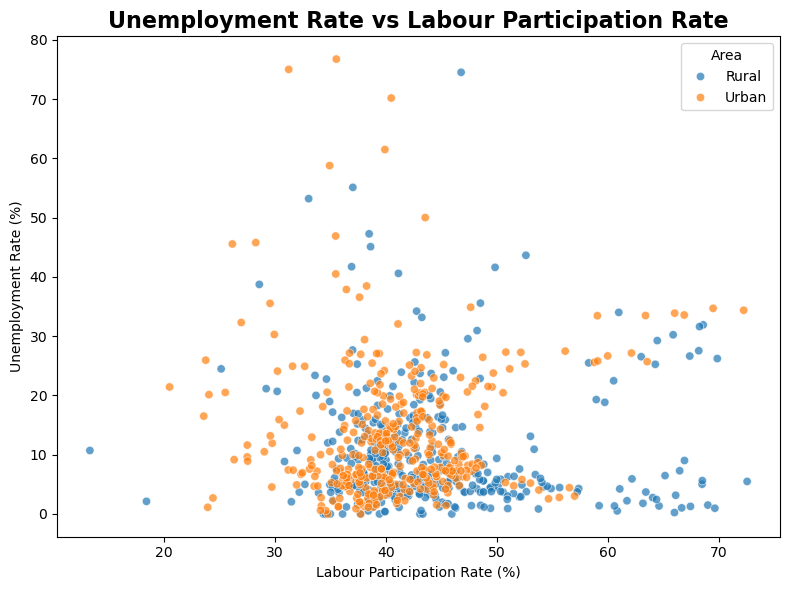

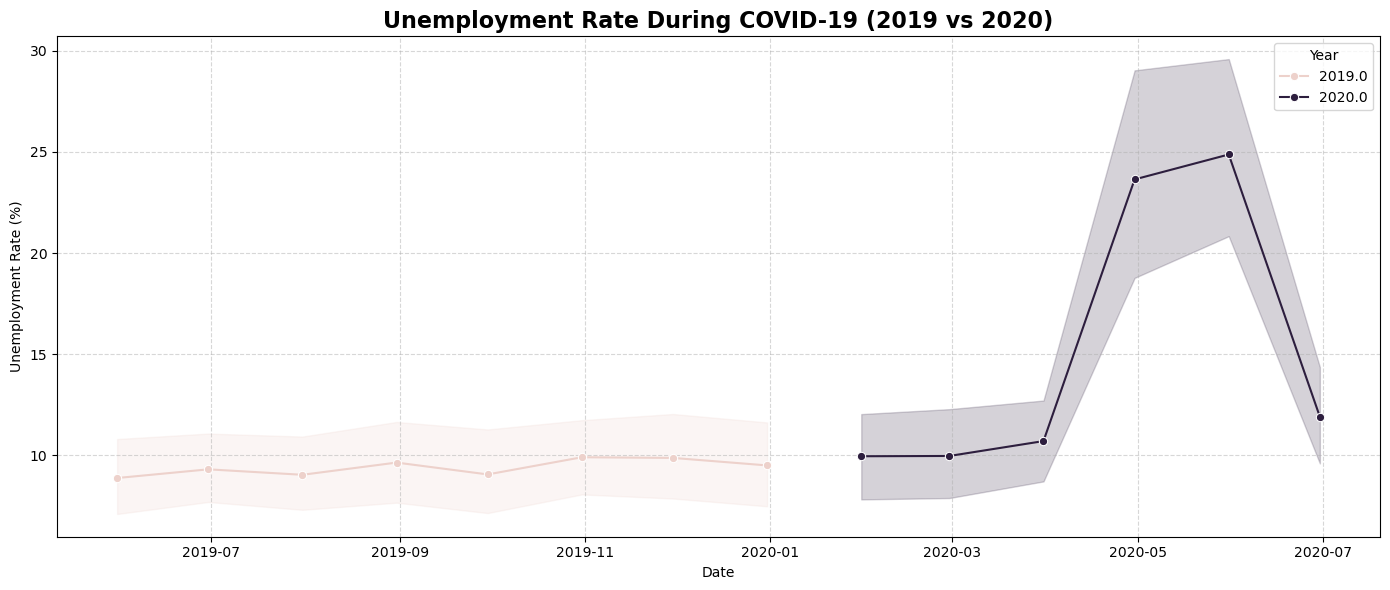


Latest Unemployment Rates (2020-06-30):

          Region  Estimated Unemployment Rate (%)  Area
         Haryana                            35.57 Rural
         Haryana                            29.41 Urban
          Kerala                            27.66 Rural
         Tripura                            27.47 Urban
    Chhattisgarh                            27.07 Urban
      Tamil Nadu                            24.93 Urban
       Jharkhand                            21.53 Rural
           Delhi                            21.14 Rural
           Bihar                            20.49 Rural
          Punjab                            20.00 Rural
       Jharkhand                            19.38 Urban
       Telangana                            19.30 Rural
 Jammu & Kashmir                            18.97 Rural
         Tripura                            18.84 Rural
           Delhi                            18.11 Urban
       Rajasthan                            13.86 Rural
   Utt

In [2]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load and clean data
df = pd.read_csv(r"C:\Users\bhavya gupta\Downloads\archive (3)\Unemployment in India.csv")
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# 3. Quick Data Overview
print("Columns:", df.columns.tolist())
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

# 4. National Unemployment Trend
national = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=national, marker='o', color='crimson')
plt.title('Average Unemployment Rate in India Over Time', fontsize=18, fontweight='bold')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 5. Statewise Unemployment Trend (Top 5 states with highest avg unemployment)
state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
top5_states = state_avg.head(5).index.tolist()
plt.figure(figsize=(16,8))
sns.lineplot(
    x='Date', y='Estimated Unemployment Rate (%)', hue='Region',
    data=df[df['Region'].isin(top5_states)], marker='o'
)
plt.title('Unemployment Rate Trends: Top 5 States', fontsize=18, fontweight='bold')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 6. Area-wise (Rural vs Urban) Unemployment Trends
plt.figure(figsize=(14,6))
sns.lineplot(
    x='Date', y='Estimated Unemployment Rate (%)', hue='Area',
    data=df, marker='o'
)
plt.title('Unemployment Rate: Rural vs Urban', fontsize=18, fontweight='bold')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend(title='Area')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 7. Top 10 States by Average Unemployment Rate
plt.figure(figsize=(12,6))
sns.barplot(
    x=state_avg.head(10).values,
    y=state_avg.head(10).index,
    color='mediumseagreen'  # Use a single color to avoid the warning
)
plt.title('Top 10 States by Average Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State/Region')
plt.tight_layout()
plt.show()

# 8. Bottom 10 States by Average Unemployment Rate
plt.figure(figsize=(12,6))
sns.barplot(
    x=state_avg.tail(10).values,
    y=state_avg.tail(10).index,
    color='cornflowerblue'  # Use a single color to avoid the warning
)
plt.title('Bottom 10 States by Average Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State/Region')
plt.tight_layout()
plt.show()

# 9. Unemployment Rate Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=30, kde=True, color='teal')
plt.title('Distribution of Unemployment Rate (%)', fontsize=16, fontweight='bold')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 10. Correlation with Labour Participation Rate
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Estimated Labour Participation Rate (%)',
    y='Estimated Unemployment Rate (%)',
    hue='Area',
    data=df, alpha=0.7
)
plt.title('Unemployment Rate vs Labour Participation Rate', fontsize=16, fontweight='bold')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()

# 11. COVID-19 Impact: 2020 vs 2019
df['Year'] = df['Date'].dt.year
covid = df[df['Year'].isin([2019, 2020])]
plt.figure(figsize=(14,6))
sns.lineplot(
    x='Date', y='Estimated Unemployment Rate (%)', hue='Year',
    data=covid, marker='o'
)
plt.title('Unemployment Rate During COVID-19 (2019 vs 2020)', fontsize=16, fontweight='bold')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 12. Summary Table: Latest Unemployment Rate by State
latest_date = df['Date'].max()
latest = df[df['Date'] == latest_date][['Region', 'Estimated Unemployment Rate (%)', 'Area']]
print(f"\nLatest Unemployment Rates ({latest_date.date()}):\n")
print(latest.sort_values('Estimated Unemployment Rate (%)', ascending=False).to_string(index=False))
